# E9 - Random Forest - Boosting

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

## Car Price Prediction

Predict if the price of a car is low or high

In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import pandas as pd

data = pd.read_csv('Dataset/dataTraincarListings.csv')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Model', 'Price'], axis=1)

data.head()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0


In [46]:
data.shape

(13150, 10)

In [6]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #13

Evaluate the accuracy on the testing set

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #7

Evaluate the accuracy on the testing set

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)`

Evaluate the accuracy on the testing set

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier()

In [9]:
pd.Series(cross_val_score(clf_rf, X, y, cv=10)).describe()

count    10.000000
mean      0.836654
std       0.011576
min       0.821293
25%       0.833460
50%       0.833840
75%       0.841065
max       0.860076
dtype: float64

In [13]:
from sklearn import metrics
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test.values)

0.8380184331797235

El accuracy del modelo RandomForestClassifier usando sklearn es de 83,80%

# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

## - n_estimators

In [51]:
estimator_range = range(1, 30, 5)
accuracy_scores = []

# Se usan 10-fold para el cross-validation en el rango de estimación de 1 a 10 n_estimators
for estimator in estimator_range:
    clf_rf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

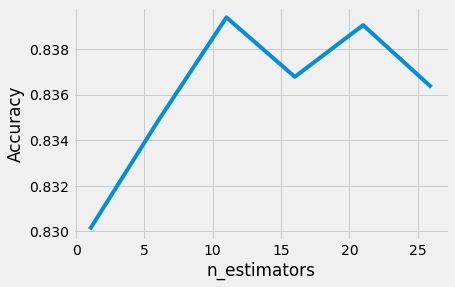

In [52]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [53]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(2, 0.8393870601589104)

In [55]:
estimator_range[2]

11

El mejor accuracy se logra con 11 estimadores, este accuracy corresponde a 83.94%.

## - max_features

Se busca encontrar el número óptimo de features teniendo en cuenta el parámetro de estimadores óptimos encontrados en el punto anterior (11 estimadores)

In [56]:
feature_cols = X_train.columns
feature_range = range(1, len(feature_cols)+1)

accuracy_scores = []

# Se usan 10-fold para el cross-validation en el rango columnas de features
for feature in feature_range:
    clf_rf = RandomForestClassifier(n_estimators=11, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

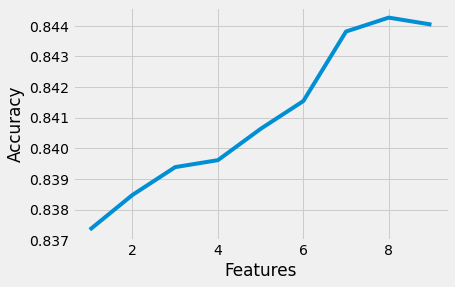

In [57]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Features')
plt.ylabel('Accuracy')

In [58]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(7, 0.8442678774120317)

El mejor accuracy se logra con 8 features (accuracy_scores + 10), este accuracy corresponde a 84.42%.

## - max_depth

Se busca encontrar la máxima profundidad de los árboles a predecir, teniendo en cuenta los parámetros óptimos encontrados de estimadores y features

In [63]:
max_depth_range = range(1, 21)
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth

for depth in max_depth_range:
    clf = RandomForestClassifier(max_depth=depth, max_features= 8, n_estimators= 11, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

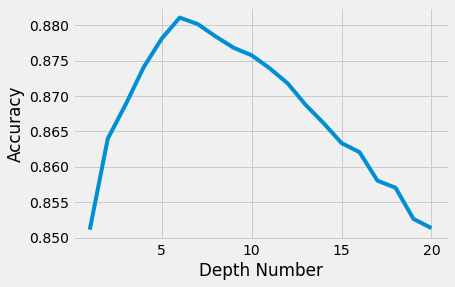

In [66]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('Depth Number')
plt.ylabel('Accuracy')

In [67]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(5, 0.8810646387832701)

El mejor accuracy se logra con depth = 6, este accuracy corresponde a 88.10%.

## - Modelo de Random Forest ajustado a los mejores parámetros

In [80]:
# max_features= 8, n_estimators= 11 & max_depth=6
clf = RandomForestClassifier(max_depth=6, n_estimators=11, max_features=8, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=8, n_estimators=11, n_jobs=-1,
                       random_state=1)

In [81]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test.values)

0.8806451612903226

Una vez se han ajustado los parámetros calibrados max_features, n_estimators y max_depth el modelo ensamblado y calibrado obtiene un accuracy aumenta al 88,06%  

# Exercise 8.7 

Using xgboost train a XGBClassifier 

Evaluate the accuracy on the testing set

In [7]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 978 kB/s eta 0:00:01


In [18]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/lorenamorales/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/lorenamorales/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [19]:
from sklearn import metrics
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.8636993076162216, 0.8412442396313364)

In [20]:
#Accuracy
acc= metrics.accuracy_score(y_pred, y_test.values)
print(acc)

0.8412442396313364


# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

* Learning_rate: Se utiliza para evitar el over-fitting, Después de cada boosting,se reducen los pesos de las nuevas funciones para que el proceso sea más conservador.
* Gamma: Es la reducción de pérdida mínima requerida para hacer una partición adicional en un nodo hoja del árbol. Cuanto mayor sea gamma, más conservador será el algoritmo.
* Colsample_bytree: es la proporción de submuestra de columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.

In [21]:
# Se establece la grilla de parámetros a calibrar
params = {
        'learning_rate': [0.08,0.09, 0.1, 0.11,0.12],
        'gamma': [0.5,0.7,0.9,1,1.1,1,2,1,3, 1.5, 2, 5],
        'colsample_bytree': [0.75, 0.8,0.85,0.9, 1.0],
        }

In [22]:
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1)

NameError: name 'XGBClassifier' is not defined

In [23]:
# Se incluye función de timer para saber cuánto se esta demorando la ejecución
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [24]:
# Aquí se configuran los parámetros establecidos para la búsqueda de grilla, y se usa el auc como medida para determinar el rendimeinto de cada iteración

#las métricas folds, param_comb y n_jobs están bajitas para disminuir el tiempo de ejecución, para una mejor calibración se puede aumentar el número
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
param_comb = 7


folds=10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=10, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

#Timer y random search
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

NameError: name 'xgb' is not defined

In [25]:
#Impresión de resultados

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
print(results)


 All results:


NameError: name 'random_search' is not defined

Se ejecuta el modelo con los parámetros calibrados

In [65]:
xgb2 = XGBClassifier(learning_rate=0.12,gamma=0.7,colsamble_bytree=0.85)

In [66]:
xgb2.fit(X_train, y_train)
y_pred = xgb2.predict(X_test)
metrics.accuracy_score(y_pred, y_test.values)

[11:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsamble_bytree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8820276497695853

### Conclusión
El accuracy del modelo calibrado es de 88.2% siendo mejor que el del modelo sin calibrar que cuenta con un accuracy de 87.9%